In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df1 = pd.read_csv('/content/sample_data/Dhaka_Apartment_Dataset.csv')
df2 = pd.read_csv('/content/sample_data/bproperty_data.csv')

In [ ]:
df2.head(1)

,Unnamed: 0,Location,Price,Type,No. Beds,No. Baths,Area,Latitude,Longitude,Region,Sub-region
0,0.0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300.0,23.86846,90.3928,Uttara,Sector 10


In [ ]:
df3 = df2[['Price', 'Type', 'No. Beds', 'No. Baths', 'Area', 'Region']]
df3.head(1)

,Price,Type,No. Beds,No. Baths,Area,Region
0,7500000,Apartment,3.0,3.0,1300.0,Uttara


In [ ]:
df4 = df3.rename(columns={
    'No. Beds': 'Bed',
    'No. Baths': 'Bath',
    'Area' : 'Size',
    'Region': 'Location'
})
df4.head(1)

,Price,Type,Bed,Bath,Size,Location
0,7500000,Apartment,3.0,3.0,1300.0,Uttara


In [ ]:
df5 = df4.iloc[:, [0,1,4,2,3,5]]
df5.head(1)

,Price,Type,Size,Bed,Bath,Location
0,7500000,Apartment,1300.0,3.0,3.0,Uttara


In [ ]:
df5.dtypes

Price         int64
Type         object
Size        float64
Bed         float64
Bath        float64
Location     object
dtype: object

In [ ]:
df5.isnull().sum()

Price         0
Type          0
Size          0
Bed         204
Bath        204
Location      0
dtype: int64

In [ ]:
df6 = df5.dropna()
df6.head(1)

,Price,Type,Size,Bed,Bath,Location
0,7500000,Apartment,1300.0,3.0,3.0,Uttara


In [ ]:
df6.head(1)

,Price,Type,Size,Bed,Bath,Location
0,7500000,Apartment,1300.0,3.0,3.0,Uttara


In [ ]:
df6.Bed = df6.Bed.astype(int)
df6.Bath = df6.Bath.astype(int)

<ipython-input-45-107915bdff34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.Bed = df6.Bed.astype(int)
<ipython-input-45-107915bdff34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.Bath = df6.Bath.astype(int)


In [ ]:
df6.dtypes

Price         int64
Type         object
Size        float64
Bed           int64
Bath          int64
Location     object
dtype: object

In [ ]:
df6.head(2)

,Price,Type,Size,Bed,Bath,Location
0,7500000,Apartment,1300.0,3,3,Uttara
1,7280000,Apartment,1456.0,4,4,Mirpur


In [ ]:
df6.shape

(4500, 6)

In [ ]:
df1.head(1)

,Unnamed: 0,price,size_in_sqf,number_of_bath,number_of_bed,full_location,location_area,purpose_of_listing,type_of_listing,completion_status
0,0,19000000.0,2350.0,4,3,"Block B, Bashundhara R-A, Dhaka",Bashundhara R-A,For Sale,Apartment,Ready


In [ ]:
df7 = df1[['price', 'size_in_sqf', 'number_of_bath', 'number_of_bed', 'location_area', 'type_of_listing']]
df7.head(1)

,price,size_in_sqf,number_of_bath,number_of_bed,location_area,type_of_listing
0,19000000.0,2350.0,4,3,Bashundhara R-A,Apartment


In [ ]:
df8 = df7.rename(columns={
   'price': 'Price',
   'size_in_sqf': 'Size',
   'number_of_bath': 'Bath',
   'number_of_bed' : 'Bed',
   'location_area': 'Location',
   'type_of_listing': 'Type'
})
df8.head(1)

,Price,Size,Bath,Bed,Location,Type
0,19000000.0,2350.0,4,3,Bashundhara R-A,Apartment


In [ ]:
df9 = df8.iloc[:, [0,5,1,3,2,4]]
df9.head(1)

,Price,Type,Size,Bed,Bath,Location
0,19000000.0,Apartment,2350.0,3,4,Bashundhara R-A


In [ ]:
df6.head(1)

,Price,Type,Size,Bed,Bath,Location
0,7500000,Apartment,1300.0,3,3,Uttara


In [ ]:
df9.dtypes

Price       float64
Type         object
Size        float64
Bed           int64
Bath          int64
Location     object
dtype: object

In [ ]:
df6.dtypes

Price         int64
Type         object
Size        float64
Bed           int64
Bath          int64
Location     object
dtype: object

In [ ]:
df9.Price = df9.Price.astype(int)

In [ ]:
df9.dtypes

Price         int64
Type         object
Size        float64
Bed           int64
Bath          int64
Location     object
dtype: object

In [ ]:
df10 = pd.concat([df9, df6], axis=0)
df10.head(1)

,Price,Type,Size,Bed,Bath,Location
0,19000000,Apartment,2350.0,3,4,Bashundhara R-A


In [ ]:
df10.shape

(15080, 6)

In [ ]:
df10.to_csv('Dhaka_appartment_clean_DS.csv', index=False)

In [ ]:
df11 = pd.read_csv('/content/sample_data/Dhaka_appartment_clean_DS.csv')
df11.head(2)

,Price,Type,Size,Bed,Bath,Location
0,19000000,Apartment,2350.0,3,4,Bashundhara R-A
1,33000000,Apartment,2294.0,3,4,Gulshan


In [ ]:
df11['Price_per_sqf'] = (df11.Price / df11.Size).astype(int)
df11.head(1)

,Price,Type,Size,Bed,Bath,Location,Price_per_sqf
0,19000000,Apartment,2350.0,3,4,Bashundhara R-A,8085


In [ ]:
df11.Type.value_counts()

Apartment    14871
Building       153
Duplex          55
Plot             1
Name: Type, dtype: int64

In [ ]:
df12 = df11[df11.Type == 'Apartment']
df12.Type.value_counts()

Apartment    14871
Name: Type, dtype: int64

In [ ]:
print(df12.Price_per_sqf.median())
print(df12.Price_per_sqf.mean())
print(df12.Price_per_sqf.std())
print(df12.Price_per_sqf.max())
print(df12.Price_per_sqf.min())

5581.0
6280.627126622285
2639.1609520760226
30000
416


In [ ]:
info = df12.copy()
info.head(1)

,Price,Type,Size,Bed,Bath,Location,Price_per_sqf
0,19000000,Apartment,2350.0,3,4,Bashundhara R-A,8085


In [ ]:
info.sort_values('Price_per_sqf', ascending=False)

,Price,Type,Size,Bed,Bath,Location,Price_per_sqf
14068,81000000,Apartment,2700.0,4,4,Baridhara,30000
3318,120000000,Apartment,4200.0,3,3,Gulshan,28571
3980,170000000,Apartment,5950.0,3,4,Gulshan,28571
1452,150000000,Apartment,5345.0,4,4,Gulshan,28063
1333,140000000,Apartment,5127.0,4,4,Baridhara,27306
...,...,...,...,...,...,...,...
3800,2300000,Apartment,1235.0,3,3,Mohammadpur,1862
3793,2200000,Apartment,1235.0,3,3,Mohammadpur,1781
2005,2200000,Apartment,1235.0,3,3,Mohammadpur,1781
11229,12000000,Apartment,15000.0,3,3,BashundharaR-A,800


In [ ]:
info.groupby('Location').Price_per_sqf.mean().sort_values(ascending=False)

Location
Banani DOHS       16804.761905
Gulshan           16234.144279
BananiDOHS        15932.500000
MohakhaliDOHS     14779.000000
Mohakhali DOHS    13914.888889
                      ...     
Demra              3820.000000
UttarKhan          3680.500000
Savar              3529.826923
Zafrabad           3401.000000
Dumni              2577.500000
Name: Price_per_sqf, Length: 80, dtype: float64

In [ ]:
len(df12.Location.unique())

80

In [ ]:
df12.Location = df12.Location.str.replace(" ", "")

<ipython-input-15-62305c9a0930>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12.Location = df12.Location.str.replace(" ", "")


In [ ]:
len(df12.Location.unique())

69

In [ ]:
info = df12.copy()

In [ ]:
info.groupby('Location').Price_per_sqf.mean().sort_values(ascending=False)

Location
BananiDOHS       16728.913043
Gulshan          16234.144279
MohakhaliDOHS    14038.333333
Banani           13421.452555
Baridhara        12923.547945
                     ...     
Shyampur          3826.773723
Demra             3820.000000
Savar             3529.826923
Zafrabad          3401.000000
Dumni             2577.500000
Name: Price_per_sqf, Length: 69, dtype: float64

<Axes: xlabel='Location', ylabel='mean'>

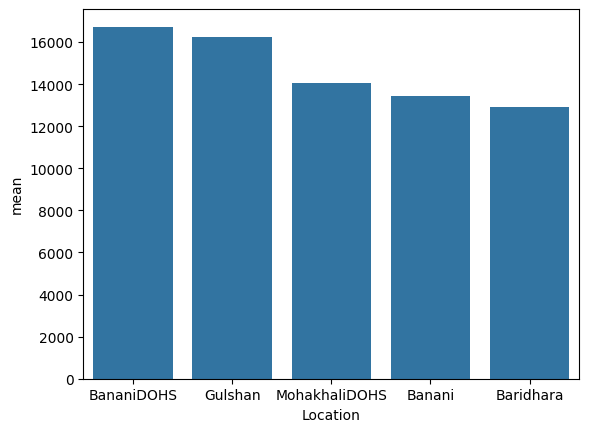

In [ ]:
top5 = info.groupby('Location').Price_per_sqf.agg(['mean', 'max', 'median', 'min']).sort_values(by='mean', ascending=False).head(5)
sns.barplot(data=top5, x='Location', y='mean')

<Axes: xlabel='Location', ylabel='mean'>

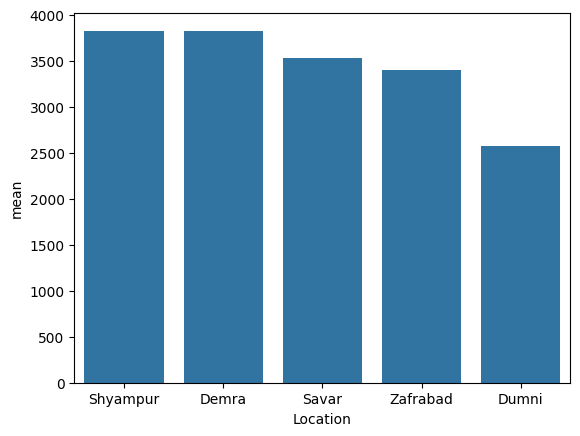

In [ ]:
least5 = info.groupby('Location').Price_per_sqf.agg(['mean', 'max', 'median', 'min']).sort_values(by='mean', ascending=False).tail(5)
sns.barplot(data=least5, x='Location', y='mean')

In [ ]:
df13 = df12.copy()
df13.head(1)

,Price,Type,Size,Bed,Bath,Location,Price_per_sqf
0,19000000,Apartment,2350.0,3,4,BashundharaR-A,8085


In [ ]:
location_count = df13.groupby('Location').Location.count()

In [ ]:
location_count[location_count<=15]

Location
Banglamotors          1
Dumni                10
Kakrail               3
Kuril                15
Nadda                 7
Nikunja              15
NorthShahjahanpur    12
Paribagh             14
Shahbagh              2
Shegunbagicha        15
Taltola               3
Zafrabad              3
Name: Location, dtype: int64

In [ ]:
location_lessthen_15 = location_count[location_count<=15]

In [ ]:
df13.Location = df13.Location.apply(lambda x: 'other' if x in location_lessthen_15 else x)

In [ ]:
len(df13.Location.unique())

58

In [ ]:
df13.shape

(14871, 7)

In [ ]:
df14 = df13.copy()

In [ ]:
def remove_price_outlier(df):
    df_output = pd.DataFrame()
    for index, subdf in df.groupby('Location'):
        m = np.mean(subdf.Price_per_sqf)
        st = np.std(subdf.Price_per_sqf)
        reduce_df = subdf[(subdf.Price_per_sqf >= (m-2*st)) & (subdf.Price_per_sqf <= (m+2*st))]
        df_output = pd.concat([df_output, reduce_df], ignore_index=True)
    return df_output

df15 = remove_price_outlier(df14)
df15.shape

(14190, 7)

In [ ]:
print(df14.Price_per_sqf.describe())
print(df15.Price_per_sqf.describe())

count    14871.000000
mean      6280.627127
std       2639.160952
min        416.000000
25%       4615.000000
50%       5581.000000
75%       7087.000000
max      30000.000000
Name: Price_per_sqf, dtype: float64
count    14190.000000
mean      6100.265469
std       2375.942122
min       1781.000000
25%       4591.000000
50%       5500.000000
75%       6934.000000
max      23809.000000
Name: Price_per_sqf, dtype: float64


In [ ]:
df15[df15.Price_per_sqf <=1781]

,Price,Type,Size,Bed,Bath,Location,Price_per_sqf
10167,2200000,Apartment,1235.0,3,3,Mohammadpur,1781
10317,2200000,Apartment,1235.0,3,3,Mohammadpur,1781


In [ ]:
df15[df15.Location=='Mohammadpur'].Price_per_sqf.mean()

5005.524324324324

In [ ]:
df16 =df15.copy()
df16.head(1)

,Price,Type,Size,Bed,Bath,Location,Price_per_sqf
0,9300000,Apartment,1450.0,3,3,Adabor,6413


In [ ]:
df17 = df16.drop(['Type', 'Price_per_sqf'], axis=1)
df17.head(1)

,Price,Size,Bed,Bath,Location
0,9300000,1450.0,3,3,Adabor


In [ ]:
df17.to_csv('clean_apartment_data.csv', index=False)

In [2]:
df18 = pd.read_csv("/content/sample_data/clean_apartment_data.csv")
df18.head(1)

,Price,Size,Bed,Bath,Location
0,9300000,1450.0,3,3,Adabor


In [4]:
location_dummy = pd.get_dummies(df18.Location)
location_dummy.head(1)

,Adabor,AftabNagar,Agargaon,Badda,Banani,BananiDOHS,Banasree,Bangshal,Baridhara,BaridharaDOHS,...,Shantinagar,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,UttarKhan,Uttara,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df19 = pd.concat([df18, location_dummy], axis=1)
df19.head(1)

,Price,Size,Bed,Bath,Location,Adabor,AftabNagar,Agargaon,Badda,Banani,...,Shantinagar,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,UttarKhan,Uttara,other
0,9300000,1450.0,3,3,Adabor,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df20 = df19.drop(['Location'], axis=1)
df20.head(0)

,Price,Size,Bed,Bath,Adabor,AftabNagar,Agargaon,Badda,Banani,BananiDOHS,...,Shantinagar,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,UttarKhan,Uttara,other


In [7]:
df20.dtypes

Price          int64
Size         float64
Bed            int64
Bath           int64
Adabor         uint8
              ...   
Tejgaon        uint8
Turag          uint8
UttarKhan      uint8
Uttara         uint8
other          uint8
Length: 62, dtype: object

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
x = df20.drop(['Price'], axis=1)
y = df20.Price

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11352, 61)
(11352,)
(2838, 61)
(2838,)


In [12]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
model.score(x_test, y_test)

0.8791935691582854

In [14]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [16]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.8913503 , 0.87528286, 0.87613534, 0.86637236, 0.88220314])

In [ ]:
model.predict()

In [18]:
def predict_price(size, bed, bath, location):
    loc_index = np.where(x.columns==location)[0][0]
    result = np.zeros(len(x.columns))
    result[0] = size
    result[1] = bed
    result[2] = bath
    if loc_index >=0:
      result[loc_index] = 1

    return model.predict([result])[0]

In [24]:
predict_price(1850, 5, 3, "Adabor")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


11253683.5

In [19]:
x.head(1)

,Size,Bed,Bath,Adabor,AftabNagar,Agargaon,Badda,Banani,BananiDOHS,Banasree,...,Shantinagar,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,UttarKhan,Uttara,other
0,1450.0,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
